<a href="https://colab.research.google.com/github/littlePanda2/ml-assignments/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 1: Dimensionality Reduction

**Course:** WBCS032-05 Introduction to Machine Learning  
**Student Names:** Marc Zhou Toneu, Sophie Schoerner
**Student Numbers:** s3692582, s4136594

---

## Assignment Overview

In this assignment, you will implement Principal Component Analysis (PCA) to reduce the dimensionality of the data, as discussed in the lecture.

You will work with the `COIL20.mat` dataset on Themis. The dataset consists of 1440 images, where each image has a size of $32 \times 32$ pixels and is flattened into a vector of length 1024. All images are stored in one matrix of size $1440 \times 1024$, where each row represents one image and each column corresponds to a pixel. The images come from 20 different objects, and each object is recorded at 72 different rotation angles, with a rotation step of 5 degrees.

## 1. Introduction (1 point)

Describe the goal of this assignment and briefly explain why dimensionality reduction and PCA are useful in data analysis.

**Your answer here:**

PCA is a linear dimensionality reduction technique that reduces the number of dimensions (features) of a dataset by transforming the original data into a new set of variables called principal components. These components capture the most important patterns and variations in the data. PCA projects the data onto a lower-dimensional space while preserving as much variance as possible. By doing so, it allows machine learning models to run faster while keeping important information, reduces dataset complexity and noise, and lowers the required computational resources such as memory, storage, and training time.

## 2. Methods (3 points)

### 2.1 Explain the PCA Algorithm (0.5 points)

Explain the PCA algorithm in a general manner.

**Your answer here:**

First, data is normalized so that all features are on a similar scale. Then, the covariance matrix of the data is calculated to understand how the features vary together. Then, eigenvalues and eigenvectors are computed from the covariance matrix to find the main directions of variation in the data, called principal components. These components are sorted by importance, and only the top components are selected. Finally, the original data is projected onto these selected components to create a lower-dimensional representation that still preserves most of the original variance.

### 2.2 Implementation (2.5 points)

You need to implement the PCA algorithm **yourself**. Both the code quality and correctness will be graded.

*__Note:__* **Do not change the cell labels! Themis will use them to automatically grade your submission.**

In [1]:
from statistics import covariance

# Load required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.manifold import TSNE
import pathlib
import pandas as pd

# Data configuration
data_file_path = pathlib.Path("COIL20.mat")
image_shape = (32, 32)

# PCA parameters
d = 40  # Target dimensionality

# t-SNE parameters
tsne_perplexity = 4

#### PCA Algorithm Steps

Implement the following steps:

1. **Normalize the data:**
   $$Z = \frac{X - \mu}{\sigma}$$
   where $\mu$ is the mean of all samples and $\sigma$ is the standard deviation.

2. **Compute the covariance matrix of the normalized data** and obtain its eigenvalues $D$ and eigenvectors $U$.  
   You may use `np.linalg.eig` in Python.

3. **Sort the eigenvectors in descending order of their eigenvalues** and select the first $d$ principal components to form $U_d$.

4. **Reduce the dimensionality of the data** by projecting the normalized data onto the selected principal components.

In [2]:
# Implement PCA here
def PCA(x, d):
    """
    Apply Principal Component Analysis.

    Args:
        x (np.ndarray): Dataset matrix (each column represents a variable)
        d (int): Dimensionality of the projection

    Returns:
        tuple: (U_d, eigen_values, Z_d)
            - U_d (np.ndarray): Matrix of principal components, sorted descending
            - eigen_values (np.ndarray): Eigenvalues, sorted descending
            - Z_d (np.ndarray): Reduced version of the dataset

    """
    # Step 1: Normalize the data (mean centering and standardization)
    x_mean = x.mean(axis=0)
    x_std = x.std(axis=0)
    x_std[x_std == 0] = 1.0 # for division by zero
    x_normalized = (x - x_mean) / x_std

    # Step 2: Compute covariance matrix
    cov_matrix = np.cov(x_normalized.T)

    # Step 3: Compute eigendecomposition
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

    # Extract real parts (covariance matrix is real and symmetric)
    eigen_values = np.real(eigen_values)
    eigen_vectors = np.real(eigen_vectors)

    # Step 4: Sort eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigen_values)[::-1]
    eigen_values_sorted = eigen_values[sorted_indices]
    eigen_vectors_sorted = eigen_vectors[:, sorted_indices]

    # Step 5: Select top d principal components
    principal_components = eigen_vectors_sorted[:, :d]

    # Step 6: Project normalized data onto principal components
    x_reduced = x_normalized @ principal_components

    return principal_components, eigen_values_sorted, x_reduced

In [4]:
# Extract dataset
input_data = scipy.io.loadmat(data_file_path)['X']

In [5]:
# Apply PCA to the dataset
U_d, eigen_values, Z_d = PCA(input_data, d)

## 3. Experimental Results (4 points)

*__Note:__* This section is not graded by Themis.

### 3.1 Eigenvalue Profile

Write code in the cell below to plot the eigenvalue profile of the data. This plot helps determine how many principal components to retain for dimensionality reduction. Make sure that all plots are clearly labeled. Each figure must include labeled axes, an appropriate title, and a legend where applicable.

- **X-axis:** Eigenvalue indices $(1, 2, \ldots, 1024)$
- **Y-axis:** Eigenvalue magnitude

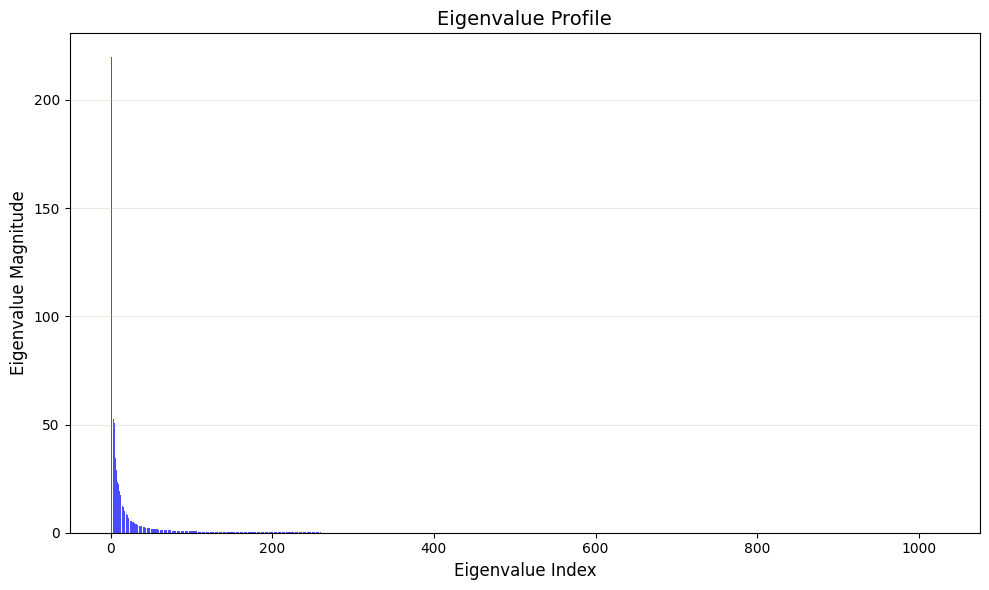

In [9]:
# Plot the eigenvalue profile
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(eigen_values) + 1), eigen_values, color='blue', alpha=0.7)
plt.xlabel('Eigenvalue Index', fontsize=12)
plt.ylabel('Eigenvalue Magnitude', fontsize=12)
plt.title('Eigenvalue Profile', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### 3.2 Dimensionality Table

Create a table reporting the dimensionality $d$ required to keep 0.9, 0.95, and 0.98 fraction of the total variance. Write code in the cell below to compute these values, then fill in the table.

Use the formula:
$$d = \frac{\sum_{i=1}^{d}\lambda_i}{\sum_{i=1}^{n}\lambda_i}$$

In [7]:
# Calculate d for variance thresholds: 0.9, 0.95, 0.98

# total variance
total_variance = np.sum(eigen_values)

# cumulative variance
cumulative_variance = np.cumsum(eigen_values)

# variance ratios
variance_ratio = cumulative_variance / total_variance

# find smallest d for each threshold
d_90 = np.argmax(variance_ratio >= 0.90) + 1
d_95 = np.argmax(variance_ratio >= 0.95) + 1
d_98 = np.argmax(variance_ratio >= 0.98) + 1

print("d for 90% variance:", d_90)
print("d for 95% variance:", d_95)
print("d for 98% variance:", d_98)

d for 90% variance: 55
d for 95% variance: 107
d for 98% variance: 206


| Variance Fraction | Dimensionality (d) |
|-------------------|-------------------|
| 0.90              | 55                   |
| 0.95              |    107               |
| 0.98              |    206               |

### 3.3 t-SNE Visualization

Visualize the reduced data using t-SNE in a 2-dimensional feature space.

- Use different colors for data points from different objects
- Every 72 data examples correspond to one object
- You can use `sklearn.manifold.TSNE` in Python with the configured perplexity parameter

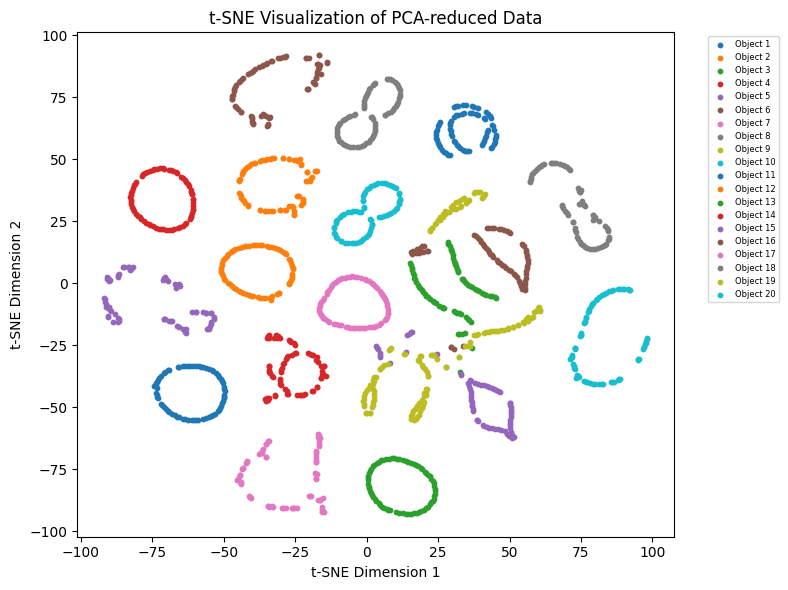

In [14]:
# TODO: Visualize reduced data using t-SNE in 2D
# Hint: Use different colors for each of the 20 objects

# Visualize reduced data using t-SNE in 2D

tsne = TSNE(n_components=2, perplexity=tsne_perplexity, random_state=42)
Z_tsne = tsne.fit_transform(Z_d)

plt.figure(figsize=(8,6))

# 20 objects each has 72 images
for i in range(20):
    start = i * 72
    end = (i + 1) * 72
    plt.scatter(Z_tsne[start:end, 0],
                Z_tsne[start:end, 1],
                label=f"Object {i+1}",
                s=10)

plt.title("t-SNE visualization of PCA-reduced data")
plt.xlabel("t-SNE dimension 1")
plt.ylabel("t-SNE dimension 2")
plt.legend(bbox_to_anchor=(1.05,1), loc ='upper left', fontsize=6)
plt.tight_layout()
plt.show()

## 4. Discussion (2 points)

Discuss your observations on the obtained results:
- What does the eigenvalue profile tell you about the data?
- How well does PCA reduce the dimensionality while preserving variance?
- What do you observe in the t-SNE visualization? Are the objects well-separated?

**Your answer here:**

The eigenvalue profile shows that the first few principal components contain most of the variance in the data, while the remaining components contribute much less. This means that the dataset has a lot of redundant information and can be represented with fewer dimensions without losing too much important information!

PCA reduces the dimensionality effectively by keeping the components with the highest variance. Even after reducing the data to a lower number of dimensions, most of the total variance is still preserved, which means that the essential structure of the data remains intact. This makes the dataset easier to process and visualize while maintaining important features.

In the t-SNE visualization, the data points form clusters that correspond to different objects. Many of the objects appear relatively well-separated, which indicates that PCA preserved meaningful structure in the data. However, some clusters could slightly overlap, showing that while PCA and t-SNE capture most patterns, not all objects are perfectly separable in lower dimensions!

### A note on Themis
Themis will only grade your implementation of the PCA algorithm, thus giving a maxiumum of `2.5` points. It does so by executing every cell up to and including the PCA call. Make sure your code runs without errors and produces the expected outputs before submitting.

## Contribution

State your individual contribution.

**Your answer here:**

Marc: 2.1, 2.2, 3.1
Sophie: Intro, 3.2, 3.3, 4